In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os


In [17]:
df = pd.read_csv("/content/customer_booking_cleaned.csv", encoding='latin-1', on_bad_lines='skip')

In [18]:
df.head()

num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
0               2      Internet  RoundTrip            262              19   
1               1      Internet  RoundTrip            112              20   
2               2      Internet  RoundTrip            243              22   
3               1      Internet  RoundTrip             96              31   
4               2      Internet  RoundTrip             68              22   

   flight_hour flight_day   route booking_origin  wants_extra_baggage  \
0            7        Sat  AKLDEL    New Zealand                    1   
1            3        Sat  AKLDEL    New Zealand                    0   
2           17        Wed  AKLDEL          India                    1   
3            4        Sat  AKLDEL    New Zealand                    0   
4           15        Wed  AKLDEL          India                    1   

   wants_preferred_seat  wants_in_flight_meals  flight_duration  \
0                     0                      0             5.52   
1                     0                      0             5.52   
2                     1                      0             5.52   
3                     0                      1             5.52   
4                     0                      1             5.52   

   booking_complete  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

In [27]:

for i in df.columns:
  print(i, df[i].nunique())

num_passengers 9
sales_channel 2
trip_type 3
purchase_lead 470
length_of_stay 335
flight_hour 24
flight_day 7
route 799
booking_origin 104
wants_extra_baggage 2
wants_preferred_seat 2
wants_in_flight_meals 2
flight_duration 21
booking_complete 2


In [19]:
df1= df.copy()

In [21]:
X = df1.drop('booking_complete', axis=1)
y = df1['booking_complete']


In [23]:
#OHE on columns
df1.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

In [32]:
from sklearn.preprocessing import OneHotEncoder
encoder= OneHotEncoder(handle_unknown='ignore')

OHE_column_=['sales_channel', 'trip_type','wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals']

encoded_df= pd.DataFrame(encoder.fit_transform(df1[OHE_column_]).toarray())
encoded_df= encoded_df.rename(columns=dict(zip(encoded_df.columns, encoder.get_feature_names_out())))
df_1= pd.concat([df1, encoded_df], axis=1)
df_1.drop(OHE_column_, axis=1, inplace=True)


In [36]:
df_1.drop(["route",	"booking_origin"], axis= 1, inplace=True)

In [42]:
df1['flight_day'].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [52]:
#mappping days
df_1['flight_day']= df_1['flight_day'].map({'Mon':1, 'Tue':2, 'Wed':3, 'Thu':4, 'Fri':5, 'Sat':6, 'Sun':7})

In [53]:
df_1.head()

num_passengers  purchase_lead  length_of_stay  flight_hour  flight_day  \
0               2            262              19            7           6   
1               1            112              20            3           6   
2               2            243              22           17           3   
3               1             96              31            4           6   
4               2             68              22           15           3   

   flight_duration  booking_complete  sales_channel_Internet  \
0             5.52                 0                     1.0   
1             5.52                 0                     1.0   
2             5.52                 0                     1.0   
3             5.52                 0                     1.0   
4             5.52                 0                     1.0   

   sales_channel_Mobile  trip_type_CircleTrip  trip_type_OneWay  \
0                   0.0                   0.0               0.0   
1                   0.0                   0.0               0.0   
2                   0.0                   0.0               0.0   
3                   0.0                   0.0               0.0   
4                   0.0                   0.0               0.0   

   trip_type_RoundTrip  wants_extra_baggage_0  wants_extra_baggage_1  \
0                  1.0                    0.0                    1.0   
1                  1.0                    1.0                    0.0   
2                  1.0                    0.0                    1.0   
3                  1.0                    1.0                    0.0   
4                  1.0                    0.0                    1.0   

   wants_preferred_seat_0  wants_preferred_seat_1  wants_in_flight_meals_0  \
0                     1.0                     0.0                      1.0   
1                     1.0                     0.0                      1.0   
2                     0.0                     1.0                      1.0   
3                     1.0                     0.0                      0.0   
4                     1.0                     0.0                      0.0   

   wants_in_flight_meals_1  
0                      0.0  
1                      0.0  
2                      0.0  
3                      1.0  
4                      1.0

In [54]:
df_1_x= df_1.drop('booking_complete', axis=1)
df_1_y= df_1['booking_complete']

In [55]:
#scaling
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
df_scaled_X = pd.DataFrame(ss.fit_transform(df_1_x), columns=df_1_x.columns)

In [58]:
df_final= pd.concat([df_scaled_X, df_1_y], axis=1)
df_final.head()

num_passengers  purchase_lead  length_of_stay  flight_hour  flight_day  \
0        0.438871       2.012327       -0.120895    -0.379512    1.101043   
1       -0.566011       0.329832       -0.091498    -1.118412    1.101043   
2        0.438871       1.799211       -0.032704     1.467740   -0.407719   
3       -0.566011       0.150366        0.231870    -0.933687    1.101043   
4        0.438871      -0.163699       -0.032704     1.098289   -0.407719   

   flight_duration  sales_channel_Internet  sales_channel_Mobile  \
0        -1.167299                0.352411             -0.352411   
1        -1.167299                0.352411             -0.352411   
2        -1.167299                0.352411             -0.352411   
3        -1.167299                0.352411             -0.352411   
4        -1.167299                0.352411             -0.352411   

   trip_type_CircleTrip  trip_type_OneWay  trip_type_RoundTrip  \
0             -0.046759         -0.089602             0.101244   
1             -0.046759         -0.089602             0.101244   
2             -0.046759         -0.089602             0.101244   
3             -0.046759         -0.089602             0.101244   
4             -0.046759         -0.089602             0.101244   

   wants_extra_baggage_0  wants_extra_baggage_1  wants_preferred_seat_0  \
0              -0.711057               0.711057                0.650317   
1               1.406357              -1.406357                0.650317   
2              -0.711057               0.711057               -1.537711   
3               1.406357              -1.406357                0.650317   
4              -0.711057               0.711057                0.650317   

   wants_preferred_seat_1  wants_in_flight_meals_0  wants_in_flight_meals_1  \
0               -0.650317                 0.861583                -0.861583   
1               -0.650317                 0.861583                -0.861583   
2                1.537711                 0.861583                -0.861583   
3               -0.650317                -1.160654                 1.160654   
4               -0.650317                -1.160654                 1.160654   

   booking_complete  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

In [62]:
#!pip install ydata-profiling
from ydata_profiling import ProfileReport

In [63]:
profile = ProfileReport(df_final, title="Profiling Report")
profile.to_file("your_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [64]:
profile

In [65]:
#splitting
from sklearn.model_selection import train_test_split
X = df_final.drop('booking_complete', axis=1)
y = df_final['booking_complete']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV


In [68]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.850653716847217


In [69]:
rf= RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9087784833769145


Text(95.72222222222221, 0.5, 'Truth')

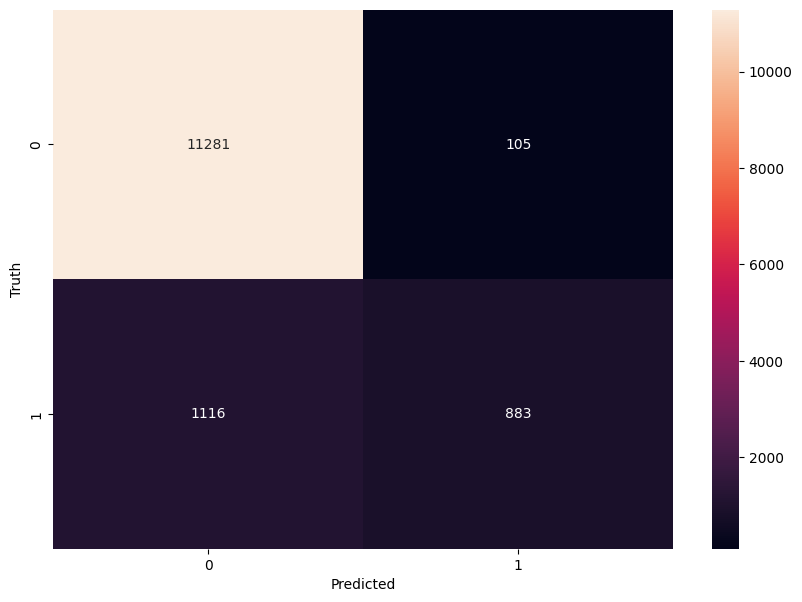

In [75]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(0.5, 0, 'Random Forest Feature Importance')

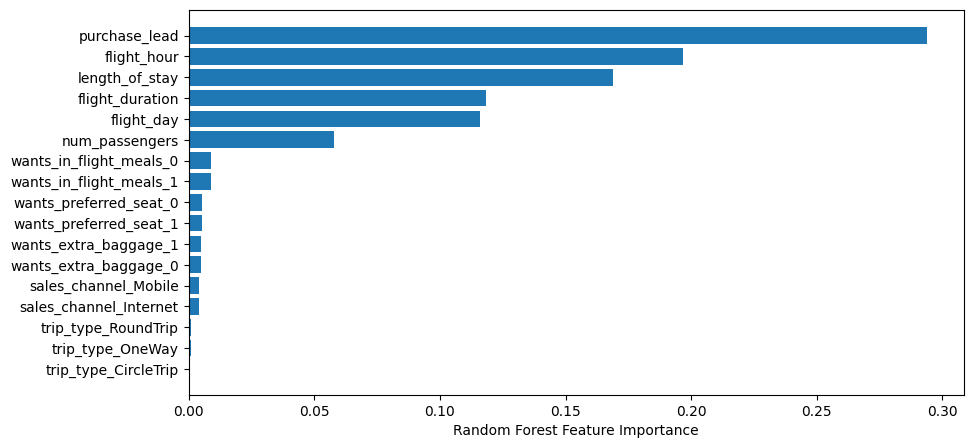

In [76]:

plt.figure(figsize=(10,5))
sorted_idx = rf.feature_importances_.argsort()
plt.barh(df_final.iloc[:,:-1].columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [77]:
df_final.booking_complete.value_counts()

booking_complete
0    57013
1     9908
Name: count, dtype: int64

In [78]:
#smote
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


In [82]:
y_train_smote.value_counts()

booking_complete
0    45627
1    45627
Name: count, dtype: int64

In [81]:
X_train.shape, X_train_smote.shape , y_train_smote.shape

((53536, 17), (91254, 17), (91254,))

In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

# Train the model
rf_smote = RandomForestClassifier()
rf_smote.fit(X_train_smote, y_train_smote)

# Predict on test data
y_pred = rf_smote.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Cross-validation (e.g., 5-fold)
cv_scores = cross_val_score(rf_smote, X_train_smote, y_train_smote, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

# Optional: Detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.89906611878969
Cross-Validation Scores: [0.785546   0.97063175 0.97035779 0.9644951  0.96975342]
Mean CV Accuracy: 0.9321568106232497
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94     11386
           1       0.75      0.49      0.59      1999

    accuracy                           0.90     13385
   macro avg       0.83      0.73      0.77     13385
weighted avg       0.89      0.90      0.89     13385

